# Examples for pytimber

Accessing the CERN logging database and extracting machine parameters.

In [1]:
%pylab
import pytimber
import datetime
log = pytimber.LoggingDB()

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## Search for parameters
Use the wildcard `%`

In [2]:
log.search("LHC.BCTDC.%:BEAM_INTENSITY%")

['LHC.BCTDC.A6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.A6R4.B2:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B1:BEAM_INTENSITY_ADC24BIT',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY',
 'LHC.BCTDC.B6R4.B2:BEAM_INTENSITY_ADC24BIT']

## Explore the parameter tree

Use the ipython autocomplete (`TAB`) to explorer the parameter tree interactively.

In [3]:
log.tree.LHC.Beam_Quality.Beam_1.get_vars()

['LHC.BQM.B1:ADC_AQUISITION_MAX',
 'LHC.BQM.B1:ADC_AQUISITION_MIN',
 'LHC.BQM.B1:ADC_WAVEFORM',
 'LHC.BQM.B1:ATTENUATION',
 'LHC.BQM.B1:BUNCH_INTENSITIES',
 'LHC.BQM.B1:BUNCH_INTENSITY_MAX',
 'LHC.BQM.B1:BUNCH_INTENSITY_MEAN',
 'LHC.BQM.B1:BUNCH_INTENSITY_MIN',
 'LHC.BQM.B1:BUNCH_INTENSITY_STDDEV',
 'LHC.BQM.B1:BUNCH_LENGTHS',
 'LHC.BQM.B1:BUNCH_LENGTH_MAX',
 'LHC.BQM.B1:BUNCH_LENGTH_MEAN',
 'LHC.BQM.B1:BUNCH_LENGTH_MIN',
 'LHC.BQM.B1:BUNCH_LENGTH_STDDEV',
 'LHC.BQM.B1:BUNCH_MEANS',
 'LHC.BQM.B1:BUNCH_PEAKS',
 'LHC.BQM.B1:BUNCH_PEAK_MAX',
 'LHC.BQM.B1:BUNCH_PEAK_MEAN',
 'LHC.BQM.B1:BUNCH_PEAK_MIN',
 'LHC.BQM.B1:BUNCH_PEAK_STDDEV',
 'LHC.BQM.B1:FILLED_BUCKETS',
 'LHC.BQM.B1:NO_BUNCHES']

## Get
get() is the main function to query data from the database. The options are:

    +    a list of variables names or a pattern for variable name matching;
    +    the start of the time window;
    +    the end of the time window (optional). If t2 is `None`, the last available data point before t1 is returned
         (search-range is one year);
    +    a pattern for fundamental data matching (optional).

### Get the latest datapoint
If only one timestamp is given as a parameter, the closest datapoint to it is returned

In [3]:
ts = datetime.datetime.now()
log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", ts)

List of variables to be queried:
LHC.BCTDC.A6R4.B1:BEAM_INTENSITY
Retrieved 1 values for LHC.BCTDC.A6R4.B1:BEAM_INTENSITY


(datetime.datetime(2015, 12, 3, 15, 50, 39), 3212811170000.0)

Timestamps can be specified as python `datetime` object or as string:

In [4]:
tsStr = "2015-10-12 18:12:32.453255123"
log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", tsStr)

List of variables to be queried:
LHC.BCTDC.A6R4.B1:BEAM_INTENSITY
Retrieved 1 values for LHC.BCTDC.A6R4.B1:BEAM_INTENSITY


(datetime.datetime(2015, 10, 12, 18, 12, 32), 8196013600.0)

### Get datapoints in a time range

Use datetime.timedelta to define time-offsets.

Here we get data from ten minutes in the past over a window of 10 seconds

In [5]:
ts1 = datetime.datetime.now() + datetime.timedelta(minutes=-10, seconds=-60)
ts2 = datetime.datetime.now() + datetime.timedelta(minutes=-10, seconds=-50)
log.get("F16.BCT.203:TOTAL_INTENSITY", ts1, ts2)

List of variables to be queried:
F16.BCT.203:TOTAL_INTENSITY
Retrieved 8 values for F16.BCT.203:TOTAL_INTENSITY


([datetime.datetime(2015, 12, 3, 15, 39, 58, 299999),
  datetime.datetime(2015, 12, 3, 15, 39, 59, 500000),
  datetime.datetime(2015, 12, 3, 15, 40, 0, 700000),
  datetime.datetime(2015, 12, 3, 15, 40, 1, 900000),
  datetime.datetime(2015, 12, 3, 15, 40, 4, 299999),
  datetime.datetime(2015, 12, 3, 15, 40, 5, 500000),
  datetime.datetime(2015, 12, 3, 15, 40, 6, 700000),
  datetime.datetime(2015, 12, 3, 15, 40, 7, 900000)],
 [0.8495, 0.9815, 1.2483, 5.1966, 0.1751, 2.3153, 0.2713, 1.6268])

### Filter by fundamental data

A pattern can be provided as last argument of get. It is used to find fundamental data (cycle names in most cases) in the given time window. Only data point having a timestamp where one of the fundamentals is present are returned.

In [6]:
ts1 = datetime.datetime(2015, 12, 3, 10, 30, 0)
ts2 = '2015-12-03 10:32:00'
log.get('F16.BCT.2%:TOTAL_INTENSITY', ts1 ,ts2, 'CPS:LHC%')

List of variables to be queried:
F16.BCT.203:TOTAL_INTENSITY
F16.BCT.212:TOTAL_INTENSITY
Querying fundamentals (pattern: CPS:LHC%):
CPS:LHC_ION_NOMINAL_PB54:ION3
Retrieved 6 values for F16.BCT.203:TOTAL_INTENSITY
Retrieved 6 values for F16.BCT.212:TOTAL_INTENSITY


{'F16.BCT.203:TOTAL_INTENSITY': ([datetime.datetime(2015, 12, 3, 10, 30, 4, 299999),
   datetime.datetime(2015, 12, 3, 10, 30, 25, 900000),
   datetime.datetime(2015, 12, 3, 10, 30, 47, 500000),
   datetime.datetime(2015, 12, 3, 10, 31, 9, 99999),
   datetime.datetime(2015, 12, 3, 10, 31, 30, 700000),
   datetime.datetime(2015, 12, 3, 10, 31, 52, 299999)],
  [4.5622, 4.2348, 4.4315, 3.7718, 4.7268, 4.4153]),
 'F16.BCT.212:TOTAL_INTENSITY': ([datetime.datetime(2015, 12, 3, 10, 30, 4, 299999),
   datetime.datetime(2015, 12, 3, 10, 30, 25, 900000),
   datetime.datetime(2015, 12, 3, 10, 30, 47, 500000),
   datetime.datetime(2015, 12, 3, 10, 31, 9, 99999),
   datetime.datetime(2015, 12, 3, 10, 31, 30, 700000),
   datetime.datetime(2015, 12, 3, 10, 31, 52, 299999)],
  [6.0375, 5.9465, 5.8345, 5.201, 6.7865, 5.7365])}

An explicit list of variables can also be provided:

In [7]:
log.mute()
log.get(['F16.BCT.126:TOTAL_INTENSITY', 'F16.BCT.203:TOTAL_INTENSITY'], ts1, ts2, 'CPS:LHC%')

{'F16.BCT.126:TOTAL_INTENSITY': ([datetime.datetime(2015, 12, 3, 10, 30, 4, 299999),
   datetime.datetime(2015, 12, 3, 10, 30, 25, 900000),
   datetime.datetime(2015, 12, 3, 10, 30, 47, 500000),
   datetime.datetime(2015, 12, 3, 10, 31, 9, 99999),
   datetime.datetime(2015, 12, 3, 10, 31, 30, 700000),
   datetime.datetime(2015, 12, 3, 10, 31, 52, 299999)],
  [4.676271, 3.9286778, 4.2757745, 3.169642, 4.4016447, 4.5504003]),
 'F16.BCT.203:TOTAL_INTENSITY': ([datetime.datetime(2015, 12, 3, 10, 30, 4, 299999),
   datetime.datetime(2015, 12, 3, 10, 30, 25, 900000),
   datetime.datetime(2015, 12, 3, 10, 30, 47, 500000),
   datetime.datetime(2015, 12, 3, 10, 31, 9, 99999),
   datetime.datetime(2015, 12, 3, 10, 31, 30, 700000),
   datetime.datetime(2015, 12, 3, 10, 31, 52, 299999)],
  [4.5622, 4.2348, 4.4315, 3.7718, 4.7268, 4.4153])}

It is also possible to query the fundamentals directly:

In [8]:
ts1 = datetime.datetime(2015, 10, 1, 0, 0, 0)
ts2 = '2015-11-01 00:00:00'
# Uses list comprehension to return a Python list
[f for f in log.getFundamentals(pytimber.toTimestamp(ts1), pytimber.toTimestamp(ts2), 'CPS:MTE%')]

['CPS:MTE_0:SFTPRO1',
 'CPS:MTE_1600:SFTPRO2',
 'CPS:MTE_2000:MD1',
 'CPS:MTE_2000:SFTPRO2',
 'CPS:MTE_2500:MD1',
 'CPS:MTE_2500:MD4',
 'CPS:MTE_2500:SFTPRO2',
 'CPS:MTE_OP:MD1']

### Get 'aligned' datasets

When working with more than one variable it is possible to set one variable as the *master* variable and acquire the other variables only for timestamps that are present for the 'master'.

This works with and without filtering by fundamentals.

By default the first variable (from an explicit list or from pattern matching) is used as the *master*.

**Note:** The output is different from the one obtained with a simple get(). The dictionnary that is returned contains only one list of timestamps ('timestamps' entry). The dictionnary contains one entry per variable with a list of values.

In [2]:
log.unmute()
log.getAligned('F16.BCT.%:TOTAL_INTENSITY', '2015-12-03 14:00:00', '2015-12-03 14:03:00', 'CPS:LHC%')

List of variables to be queried:
F16.BCT.126:TOTAL_INTENSITY (using as master).
F16.BCT.203:TOTAL_INTENSITY
F16.BCT.212:TOTAL_INTENSITY
F16.BCT.372:TOTAL_INTENSITY
Querying fundamentals (pattern: CPS:LHC%):
CPS:LHC_ION_NOMINAL_PB54:ION3
Retrieved 8 values for F16.BCT.126:TOTAL_INTENSITY (master)
Retrieved 8 values for F16.BCT.203:TOTAL_INTENSITY
Retrieved 8 values for F16.BCT.212:TOTAL_INTENSITY
Retrieved 8 values for F16.BCT.372:TOTAL_INTENSITY


{'F16.BCT.126:TOTAL_INTENSITY': [4.5237007,
  4.5999856,
  4.188047,
  4.268146,
  4.5046296,
  4.2147465,
  4.4550443,
  4.5046296],
 'F16.BCT.203:TOTAL_INTENSITY': [4.8991,
  4.8552,
  4.8256,
  4.8235,
  4.7284,
  4.8768,
  4.7939,
  4.8701],
 'F16.BCT.212:TOTAL_INTENSITY': [6.86,
  6.517,
  6.3805,
  6.9755,
  6.594,
  6.7445,
  6.272,
  6.272],
 'F16.BCT.372:TOTAL_INTENSITY': [7.2526,
  7.225,
  6.9502,
  7.0758,
  6.8919,
  7.1064,
  7.2472,
  7.3118],
 'timestamps': [datetime.datetime(2015, 12, 3, 14, 0, 18, 700000),
  datetime.datetime(2015, 12, 3, 14, 0, 40, 299999),
  datetime.datetime(2015, 12, 3, 14, 1, 1, 900000),
  datetime.datetime(2015, 12, 3, 14, 1, 23, 500000),
  datetime.datetime(2015, 12, 3, 14, 1, 45, 99999),
  datetime.datetime(2015, 12, 3, 14, 2, 6, 700000),
  datetime.datetime(2015, 12, 3, 14, 2, 28, 299999),
  datetime.datetime(2015, 12, 3, 14, 2, 49, 900000)]}

## Use cases

### Plot timestamped data

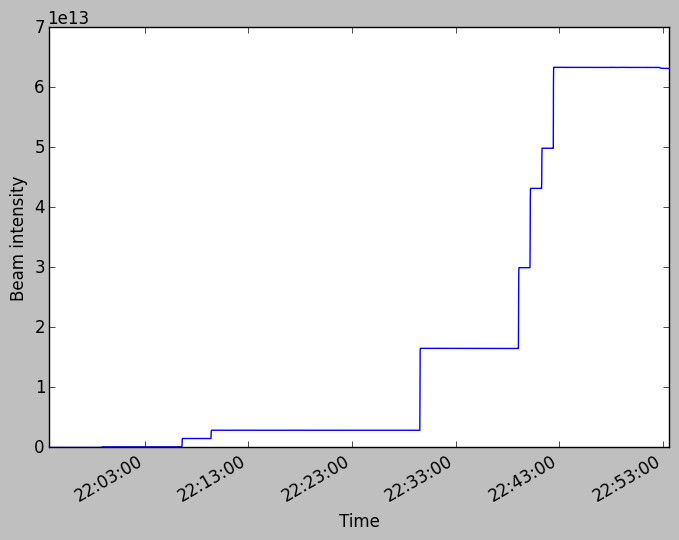

In [27]:
ts1 = datetime.datetime.now() + datetime.timedelta(hours=-1)
ts2 = datetime.datetime.now()
tss, dat = log.get("LHC.BCTDC.A6R4.B1:BEAM_INTENSITY", ts1, ts2)
plot( tss, dat, "-" )
xlabel("Time")
ylabel("Beam intensity")
xfmt = DateFormatter('%H:%M:%S')
gca().xaxis.set_major_formatter(xfmt)
gcf().autofmt_xdate()
display(gcf())
close()

### Dealing with arrays
get individual bunch intensities

2015-10-21 21:53:46.628999
[ 0.  0.  0. ...,  0.  0.  0.]


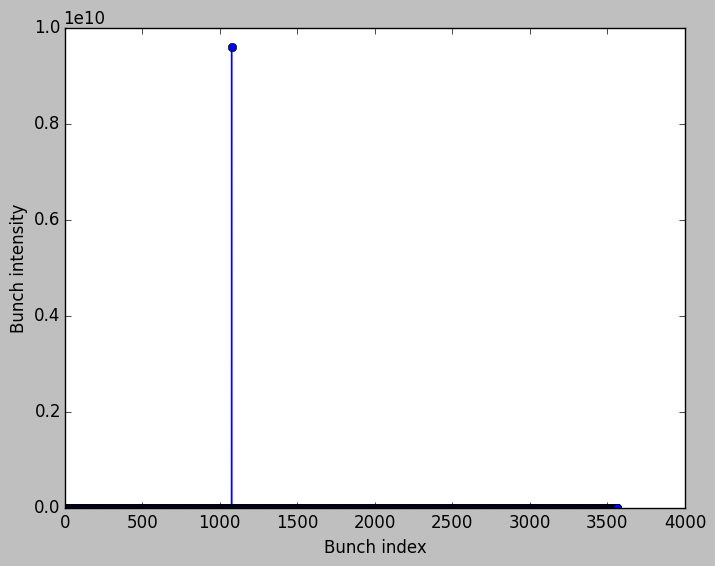

In [31]:
tss, dat = log.get("LHC.BCTFR.A6R4.B1:BUNCH_INTENSITY", ts1)
print( tss )
print( dat )
plot( dat, "o-" )
xlabel("Bunch index")
ylabel("Bunch intensity")
display(gcf())
close()